In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/amritpal-singh/Downloads/Iris Flower - Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Checking the unique values and data type of each and every column
for column in df.columns:
    print(column," : ", df[column].unique())
    print(column, " : ", df[column].dtype)

Id  :  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150]
Id  :  int64
SepalLengthCm  :  [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
SepalLengthCm  :  float64
SepalWidthCm  :  [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
SepalWidthCm  :  float64
PetalLengthCm  :  [1.4 1.3 1.5 1.7 1.6 1.1 1.2

In [4]:
#Drop the Id as its not releated to the data and just a index number and will not be need for training the model
df = df.drop(columns=['Id'])

In [5]:
# Data exploration
print(df.describe())
print(df['Species'].value_counts())

# Check for any missing values
print(df.isnull().sum())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000
Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

x = df.drop(["Species"], axis = 1)
y = df.Species

labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(y)

scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [7]:
y_pred = knn.predict(x_test)

# Evaluate the model using confusion matrix, Classification report and Accuracy score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy Score:
1.0


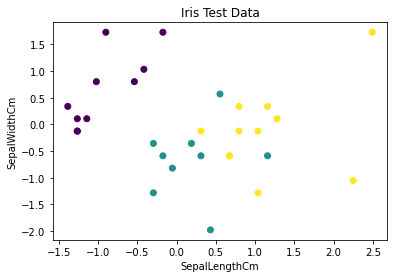

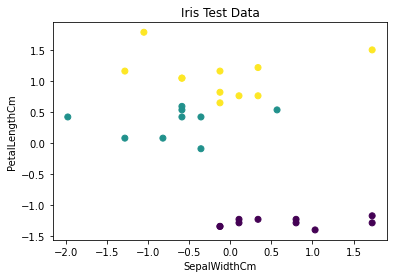

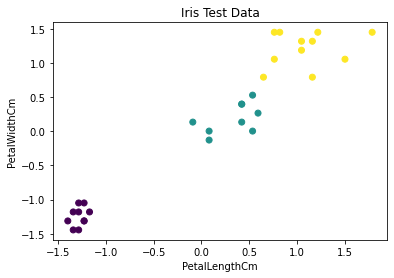

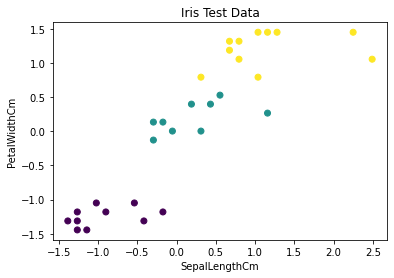

In [8]:
import matplotlib.pyplot as plt

# Visualize the first two features
for i in range(len(df.columns) - 1):
    if i == 3 :
        plt.scatter(x_test[:, 0], x_test[:, i], c=y_test, cmap='viridis')
        plt.title('Iris Test Data')
        plt.xlabel(df.columns[0])
        plt.ylabel(df.columns[i])
        plt.show()
        break
    plt.scatter(x_test[:, i], x_test[:, i+1], c=y_test, cmap='viridis')
    plt.title('Iris Test Data')
    plt.xlabel(df.columns[i])
    plt.ylabel(df.columns[i+1])
    plt.show()